In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import qcodes as qc
import qcodes.instrument_drivers.nplab_drivers as npd

In [2]:
npd.triton_init('lockin865', 'lockin830', 'srframe')
station = qc.Station(triton, lockin865, lockin830, srframe)

Connected to: OXFORD INSTRUMENTS Triton (serial:N/A, firmware:2.449) in 0.03s
Connected to: Stanford_Research_Systems SR865A (serial:003538, firmware:V1.51) in 0.55s
Connected to: Stanford_Research_Systems SR830 (serial:s/n49840, firmware:ver1.07) in 0.04s
Connected to: Stanford_Research_Systems SIM900 (serial:s/n152150, firmware:ver3.6) in 0.75s


In [3]:
srframe.volt_p1.step = 0.08
srframe.volt_p1.inter_delay = 0.1
srframe.volt_p5.step = 0.08
srframe.volt_p5.inter_delay = 0.1

In [23]:
%matplotlib notebook


In [9]:
srframe.volt_p1(-10)
time.sleep(10)
gvals = np.linspace(-10, 12, 221)
data1, plot1 = npd.single_param_sweep(srframe.volt_p1, gvals, 2.1, lockin865.X, lockin865.Y, DataName='M05_21-20_basetemp_-1mT_1nA')
srframe.volt_p1(0)

Started at 2020-01-12 15:10:54
DataSet:
   location = 'data/2020-01-12/#005_M05_21-20_basetemp_-1mT_1nA_15-10-53'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (221,)
   Measured | lockin865_X         | X            | (221,)
   Measured | lockin865_Y         | Y            | (221,)
Finished at 2020-01-12 15:19:37


<IPython.core.display.Javascript object>


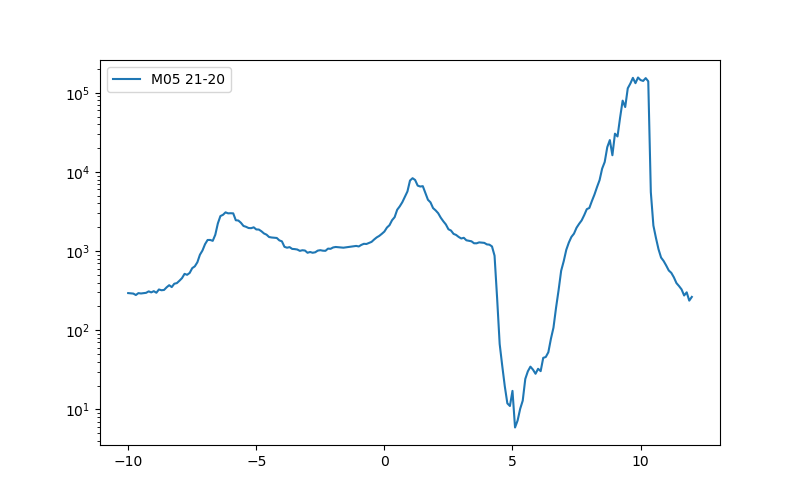

In [10]:
plt.figure(figsize=(8, 5))
plt.semilogy(gvals, np.abs(data1.lockin865_X[:]/1e-9), label='M05 21-20')
plt.legend()

In [11]:
srframe.volt_p1(5.1)

In [12]:
offvals = np.linspace(2500e-3, -2500e-3, 101)
bvals = np.linspace(0.1, -0.1, 201)
data2, plot2 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=8, SetDelay2=1.05, Param2_SetBetween=0, DataName='M05_21-20_865_Fraunhofer_vbg=5.1V_AC1.5nAdvdi_baseT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-01-12 15:31:23
Are you sure you want to use the magnet? [y/n]: y
Please wait 39.268 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.294 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.3 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.3 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.306000000000001 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.3 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.288 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.3 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.294 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.294 secon

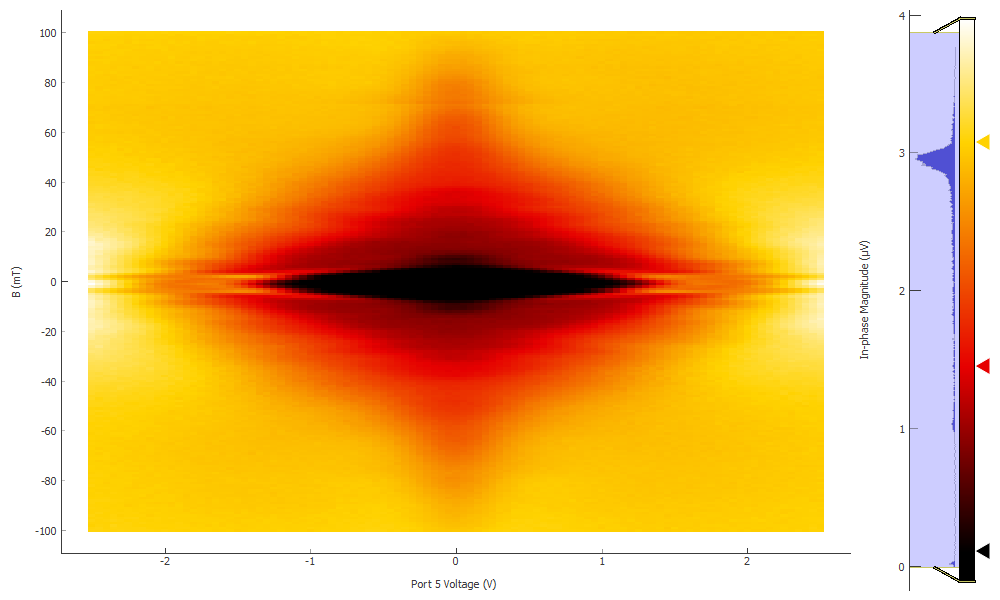

In [28]:
plot2[0]

In [13]:
srframe.volt_p1(5.1)
lockin865.amplitude(0.1)
time.sleep(10)
offvals = np.linspace(2500e-3, -2500e-3, 101)
bvals = np.linspace(0.015, -0.020, 141)
data3, plot3 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=10, SetDelay2=1.1, Param2_SetBetween=0, DataName='M05_21-20_865_Fraunhofer_vbg=5.1V_AC1nAdvdi_baseT')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-01-12 23:22:04
Please wait 43.660000000000004 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.066 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.072 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.078 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.078 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.078 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.084 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.072 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.084 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.078 seconds for the field sweep, plus the time requ

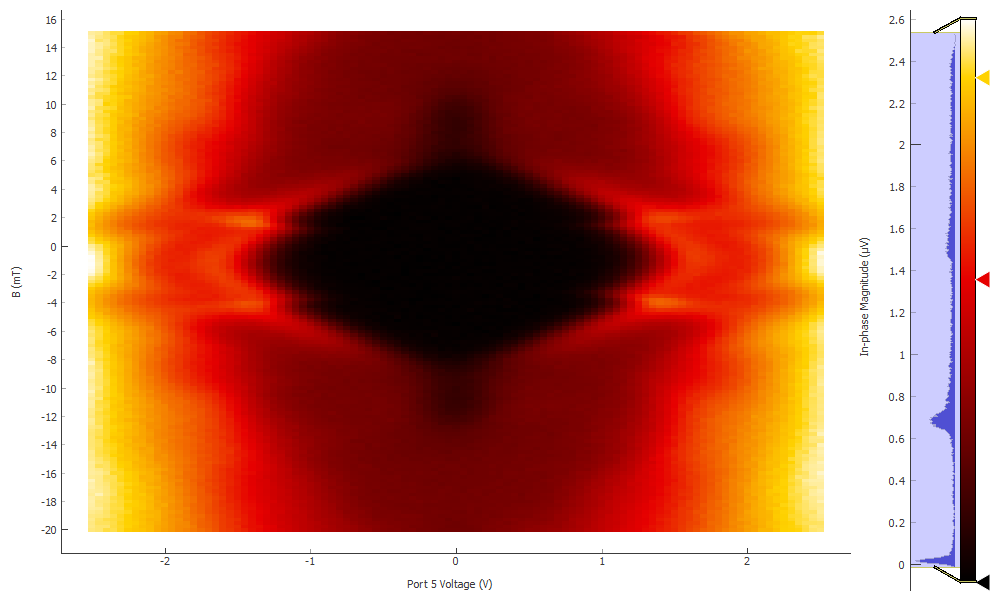

In [27]:
plot3[0]

# Graphene Nb JJ

Contact setup: 25, 26 separately bonded to one Nb pad, 3,4 separately bonded to the other. Sending current through a 1 Mohm resistor, AC source from lockin865 connected through the summing amplifier, with DC source from SRS mainframe.

In [14]:
# 10nA excitation, 1 uA DC to suppress SC
srframe.volt_p1(-7)
time.sleep(15)
gvals = np.linspace(-7, 7, 141)
data4, plot4 = npd.single_param_sweep(srframe.volt_p1, gvals, 2.1, lockin865.X, lockin865.Y, DataName='NbJJ1_10nAexcitation_1uADC_gatesweep')

Started at 2020-01-13 11:45:32
DataSet:
   location = 'data/2020-01-13/#001_NbJJ1_10nAexcitation_1uADC_gatesweep_11-45-31'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (141,)
   Measured | lockin865_X         | X            | (141,)
   Measured | lockin865_Y         | Y            | (141,)
Finished at 2020-01-13 11:51:06


In [15]:
srframe.volt_p1(0)

In [16]:
# 10nA excitation, 0uA DC
srframe.volt_p1(-7)
time.sleep(15)
gvals = np.linspace(-7, 7, 141)
data5, plot5 = npd.single_param_sweep(srframe.volt_p1, gvals, 2.1, lockin865.X, lockin865.Y, DataName='NbJJ1_10nAexcitation_0DC_gatesweep')
srframe.volt_p1(0)

Started at 2020-01-13 11:52:02
DataSet:
   location = 'data/2020-01-13/#002_NbJJ1_10nAexcitation_0DC_gatesweep_11-52-01'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (141,)
   Measured | lockin865_X         | X            | (141,)
   Measured | lockin865_Y         | Y            | (141,)
Finished at 2020-01-13 11:57:36


<IPython.core.display.Javascript object>


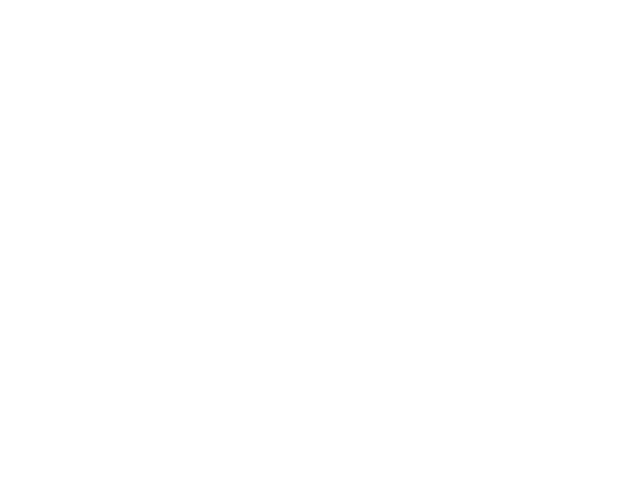

NameError: name 'data4' is not defined

In [24]:
plt.figure()
plt.plot(gvals, data4.lockin865_X[:]/10e-9, label='1 uA DC offset', lw=1)
plt.plot(gvals, data5.lockin865_X[:]/10e-9, label='0 DC offset', lw=1)
plt.legend()

# Back to the M05 device. Temperature sweep

In [23]:
triton.pid_range(3.16)

In [24]:
triton.pid_setpoint(0.05)

In [25]:
triton.pid_range(10)

In [26]:
Gvals = np.linspace(-10, 12, 221)
Tvals = np.linspace(0.05, 1, 20)
data6, plot6 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, Gvals, lockin865.X, lockin865.Y, SetDelay1=200, SetDelay2=3, Param2_SetBetween=0, DataName='M05_21-20_865_1nAexcitation_to1K_-1mT')

Started at 2020-01-13 12:12:21
DataSet:
   location = 'data/2020-01-13/#003_M05_21-20_865_1nAexcitation_to1K_-1mT_12-12-20'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (20, 221)
   Measured | lockin865_X             | X            | (20, 221)
   Measured | lockin865_Y             | Y            | (20, 221)
Finished at 2020-01-13 17:31:01


In [29]:
triton.pid_range(31.6)
time.sleep(10)

In [30]:
Tvals = np.linspace(1.05, 1.4, 8)
data7, plot7 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, Gvals, lockin865.X, lockin865.Y, SetDelay1=200, SetDelay2=3, Param2_SetBetween=0, DataName='M05_21-20_865_1nAexcitation_1p05to1p4K_-1mT')

Started at 2020-01-13 17:31:13
DataSet:
   location = 'data/2020-01-13/#004_M05_21-20_865_1nAexcitation_1p05to1p4K_-1mT_17-31-12'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (8,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (8, 221)
   Measured | lockin865_X             | X            | (8, 221)
   Measured | lockin865_Y             | Y            | (8, 221)
Finished at 2020-01-13 19:38:38


In [31]:
triton.pid_range(100)
time.sleep(10)

In [32]:
Tvals = np.linspace(1.45, 2, 12)
data8, plot8 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, Gvals, lockin865.X, lockin865.Y, SetDelay1=220, SetDelay2=3, Param2_SetBetween=0, DataName='M05_21-20_865_1nAexcitation_to1p45to2K_-1mT')

Started at 2020-01-13 19:38:51
DataSet:
   location = 'data/2020-01-13/#005_M05_21-20_865_1nAexcitation_to1p45to2K_-1mT_19-38-48'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (12,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (12, 221)
   Measured | lockin865_X             | X            | (12, 221)
   Measured | lockin865_Y             | Y            | (12, 221)
Finished at 2020-01-13 22:53:55


After turning off the turbo, switching V4, V9

In [33]:
triton.pid_range(100)

In [36]:
triton.pid_setpoint(2.2)

In [37]:
Tvals = np.linspace(2.2, 10, 41)
data9, plot9 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, Gvals, lockin865.X, lockin865.Y, SetDelay1=240, SetDelay2=3, Param2_SetBetween=0, DataName='M05_21-20_865_1nAexcitation_to2p2to10K_-1mT')

Started at 2020-01-13 23:43:26
DataSet:
   location = 'data/2020-01-13/#006_M05_21-20_865_1nAexcitation_to2p2to10K_-1mT_23-43-24'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (41,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (41, 221)
   Measured | lockin865_X             | X            | (41, 221)
   Measured | lockin865_Y             | Y            | (41, 221)
Finished at 2020-01-14 11:03:42


In [38]:
Tvals = np.linspace(11, 30, 20)
data10, plot10 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, Gvals, lockin865.X, lockin865.Y, SetDelay1=240, SetDelay2=3, Param2_SetBetween=0, DataName='M05_21-20_865_1nAexcitation_to11to30K_-1mT')

Started at 2020-01-14 11:03:44
DataSet:
   location = 'data/2020-01-14/#001_M05_21-20_865_1nAexcitation_to11to30K_-1mT_11-03-42'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (20,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (20, 221)
   Measured | lockin865_X             | X            | (20, 221)
   Measured | lockin865_Y             | Y            | (20, 221)
Finished at 2020-01-14 16:35:22


In [40]:
triton.write('SET:DEV:V1:VALV:SIG:STATE:CLOSE')

In [41]:
triton.read_valves()

V1:  CLOSE
V2:  CLOSE
V3:  CLOSE
V4:  OPEN
V5:  OPEN
V6:  CLOSE
V7:  CLOSE
V8:  CLOSE
V9:  CLOSE


In [42]:
Tvals = np.linspace(30, 40, 11)
data11, plot11 = npd.twod_param_sweep(triton.pid_setpoint, Tvals, srframe.volt_p1, Gvals, lockin865.X, lockin865.Y, SetDelay1=300, SetDelay2=3, Param2_SetBetween=0, DataName='M05_21-20_865_1nAexcitation_to30to40K_-1mT')

Started at 2020-01-15 08:20:53
DataSet:
   location = 'data/2020-01-15/#001_M05_21-20_865_1nAexcitation_to30to40K_-1mT_08-20-52'
   <Type>   | <array_id>              | <array.name> | <array.shape>
   Setpoint | triton_pid_setpoint_set | pid_setpoint | (11,)
   Setpoint | srframe_volt_p1_set     | volt_p1      | (11, 221)
   Measured | lockin865_X             | X            | (11, 221)
   Measured | lockin865_Y             | Y            | (11, 221)
Finished at 2020-01-15 11:34:18


In [45]:
#Now goes to Nb G junction electrode 28,27-6,7 300nm 1Mohm resistor

In [47]:
# 10nA excitation, 0uA DC
srframe.volt_p1(-7)
time.sleep(30)
gvals = np.linspace(-7, 7, 141)
data12, plot12 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, DataName='NbJJ1_28,27-6,7_300nm_10nAexcitation_0DC_gatesweep')
srframe.volt_p1(0)

Started at 2020-01-15 19:16:18
DataSet:
   location = 'data/2020-01-15/#003_NbJJ1_28,27-6,7_300nm_10nAexcitation_0DC_gatesweep_19-16-17'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (141,)
   Measured | lockin865_X         | X            | (141,)
   Measured | lockin865_Y         | Y            | (141,)
Finished at 2020-01-15 19:23:59


In [11]:
triton.field(-0.0008)

Sweep time approximately 10.138 seconds


In [12]:
lockin865.amplitude(0.01)

In [ ]:
# 10nA excitation, 0uA DC
srframe.volt_p1(-7)
time.sleep(30)
gvals = np.linspace(-7, 7, 141)
data12, plot12 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, DataName='NbJJ1_28,27-6,7_300nm_10nAexcitation_0DC_gatesweep')
srframe.volt_p1(0)

In [14]:
srframe.volt_p5(1)

In [15]:
# 10nA excitation, 1uA DC
srframe.volt_p1(-7)
time.sleep(30)
gvals = np.linspace(-7, 7, 141)
data19, plot19 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, DataName='NbJJ1_28,27-6,7_300nm_10nAexcitation_1uADC_gatesweep')
srframe.volt_p1(0)

Started at 2020-01-16 10:37:50
DataSet:
   location = 'data/2020-01-16/#004_NbJJ1_28,27-6,7_300nm_10nAexcitation_1uADC_gatesweep_10-37-49'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (141,)
   Measured | lockin865_X         | X            | (141,)
   Measured | lockin865_Y         | Y            | (141,)
Finished at 2020-01-16 10:45:39


In [17]:
srframe.volt_p5(0)

In [18]:
# 10nA excitation, 0uA DC
srframe.volt_p1(-7)
time.sleep(30)
gvals = np.linspace(-7, 7, 141)
data20, plot20 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, DataName='NbJJ1_28,27-6,7_300nm_10nAexcitation_0uADC_gatesweep')
srframe.volt_p1(0)

Started at 2020-01-16 10:47:37
DataSet:
   location = 'data/2020-01-16/#005_NbJJ1_28,27-6,7_300nm_10nAexcitation_0uADC_gatesweep_10-47-36'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (141,)
   Measured | lockin865_X         | X            | (141,)
   Measured | lockin865_Y         | Y            | (141,)
Finished at 2020-01-16 10:55:18


<IPython.core.display.Javascript object>


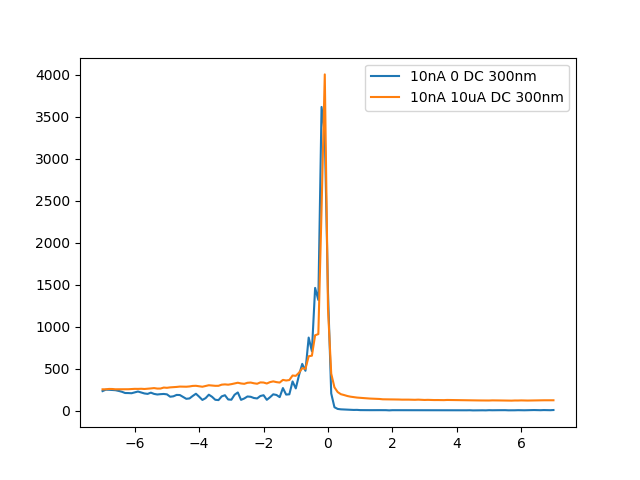

In [25]:
plt.figure()
plt.plot(gvals, data20.lockin865_X[:]/10e-9, label='10nA 0 DC 300nm')
plt.plot(gvals, data19.lockin865_X[:]/10e-9, label='10nA 10uA DC 300nm')
plt.legend()

In [49]:
srframe.volt_p1(4)
srframe.volt_p5(-1000e-3)
time.sleep(10)
offvals = np.linspace(-1000e-3, 1000e-3, 201)
data13, plot13 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='NbJJ1_28,27-6,7_300nm_10nAexcitation_Vg=4V_dvdi')
srframe.volt_p5(0)

Started at 2020-01-15 19:28:42
DataSet:
   location = 'data/2020-01-15/#004_NbJJ1_28,27-6,7_300nm_10nAexcitation_Vg=4V_dvdi_19-28-41'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-15 19:32:46


In [26]:
datadvdi1 = qc.load_data('data/2020-01-15/#004_NbJJ1_28,27-6,7_300nm_10nAexcitation_Vg=4V_dvdi_19-28-41')

<IPython.core.display.Javascript object>


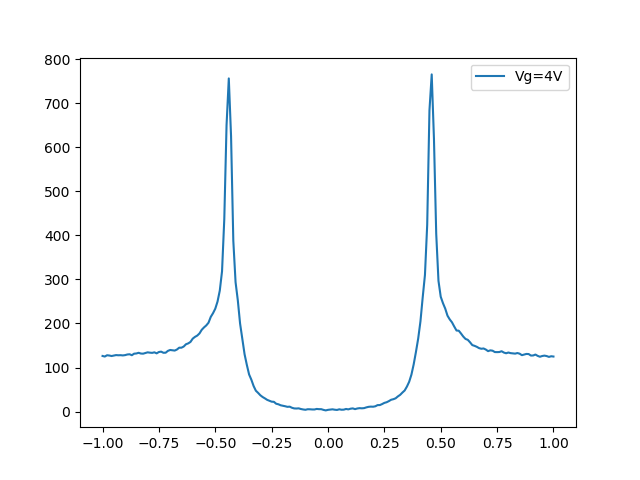

In [27]:
plt.figure()
plt.plot(datadvdi1.srframe_volt_p5_set, datadvdi1.lockin865_X[:]/10e-9, label='Vg=4V')
plt.legend()

In [50]:
srframe.volt_p1(5)
srframe.volt_p5(-1000e-3)
time.sleep(10)
offvals = np.linspace(-1000e-3, 1000e-3, 201)
data14, plot14 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='NbJJ1_28,27-6,7_300nm_10nAexcitation_Vg=5V_dvdi')
srframe.volt_p5(0)

Started at 2020-01-15 19:33:03
DataSet:
   location = 'data/2020-01-15/#005_NbJJ1_28,27-6,7_300nm_10nAexcitation_Vg=5V_dvdi_19-33-02'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-15 19:37:07


In [51]:
triton.magnet_POC(0)

In [52]:
triton.magnet_swh(1)

Wait 5 min for the switch to warm


In [54]:
srframe.volt_p1(4)
offvals = np.linspace(600e-3, 0, 121)
bvals = np.linspace(0.005, -0.005, 101)
data15, plot15 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=8, SetDelay2=1, DataName='NbJJ1_28,27-6,7_300nm_Vg=4V_excitation=5nA_dvdi-Bsweep')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-01-15 19:43:18
Please wait 10.582 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.036 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.036 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.036 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.024 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.03 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.024 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.03 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.03 seconds for the field sweep, plus the time required for operat

In [8]:
srframe.volt_p1(4)
offvals = np.linspace(600e-3, 0, 121)
bvals = np.linspace(0.001, -0.003, 101)
data16, plot16 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=8, SetDelay2=1, DataName='NbJJ1_28,27-6,7_300nm_Vg=4V_excitation=5nA_dvdi-Bsweep')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-01-16 00:35:25
Are you sure you want to use the magnet? [y/n]: y
Please wait 10.252 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.024 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.012 seconds f

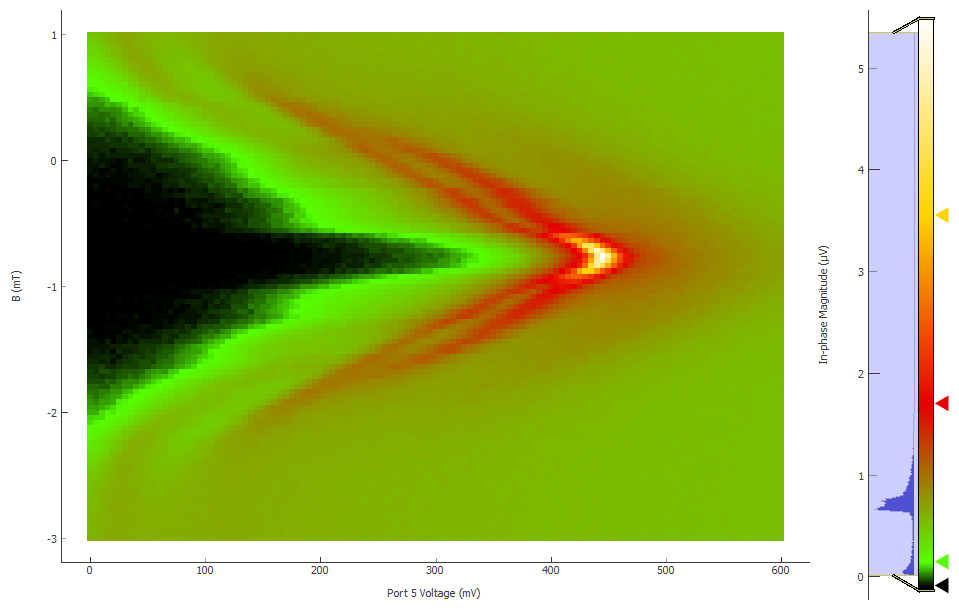

In [226]:
plot16[0]

In [9]:
srframe.volt_p1(-3)
offvals = np.linspace(300e-3, 0, 121)
bvals = np.linspace(0.0015, -0.0035, 101)
data17, plot17 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=8, SetDelay2=1, DataName='NbJJ1_28,27-6,7_300nm_Vg=-3V_excitation=5nA_dvdi-Bsweep')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-01-16 04:39:59
Please wait 11.32 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.006 seconds for the field sweep, plus the time required for oper

In [10]:
srframe.volt_p1(-5)
offvals = np.linspace(100e-3, 0, 101)
bvals = np.linspace(0.001, -0.003, 101)
data18, plot18 = npd.twod_param_sweep(triton.field_set_stable, bvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=8, SetDelay2=1, DataName='NbJJ1_28,27-6,7_300nm_Vg=-5V_excitation=5nA_dvdi-Bsweep')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-01-16 08:35:35
Please wait 11.266 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.018 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.006 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.012 seconds for the field sweep, plus the time required for operating the switch...
Please wait 10.012 seconds for the field sweep, plus the time required for ope

In [7]:
srframe.volt_p5(0)

In [21]:
#RF Ta Nb junction, electron side Vg=4V, IcRn= 450nA*130 ohm~60ueV
#                   hole side   Vg=-5V, IcRn= 20nA* 500 ohm~10ueV 

In [22]:
# Al junction, IcRn= 0.8uA*25ohm~20ueV

# now go to Ti/Nb junction

In [31]:
# 20nA excitation, 5uA DC
srframe.volt_p1(-7)
time.sleep(30)
gvals = np.linspace(-7, 7, 141)
data23, plot23 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_20nAexcitation_5uADC_gatesweep')
srframe.volt_p1(0)

Started at 2020-01-16 13:27:30
DataSet:
   location = 'data/2020-01-16/#007_Nb-Tijunction_42,41-44,45_20nAexcitation_5uADC_gatesweep_13-27-29'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (141,)
   Measured | lockin865_X         | X            | (141,)
   Measured | lockin865_Y         | Y            | (141,)
Finished at 2020-01-16 13:35:11


In [32]:
srframe.volt_p5(0)

In [33]:
# 20nA excitation, 0uA DC
srframe.volt_p1(-7)
time.sleep(30)
gvals = np.linspace(-7, 7, 141)
data24, plot24 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_20nAexcitation_0uADC_gatesweep')
srframe.volt_p1(0)

Started at 2020-01-16 13:36:09
DataSet:
   location = 'data/2020-01-16/#008_Nb-Tijunction_42,41-44,45_20nAexcitation_0uADC_gatesweep_13-36-08'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (141,)
   Measured | lockin865_X         | X            | (141,)
   Measured | lockin865_Y         | Y            | (141,)
Finished at 2020-01-16 13:43:50


<IPython.core.display.Javascript object>


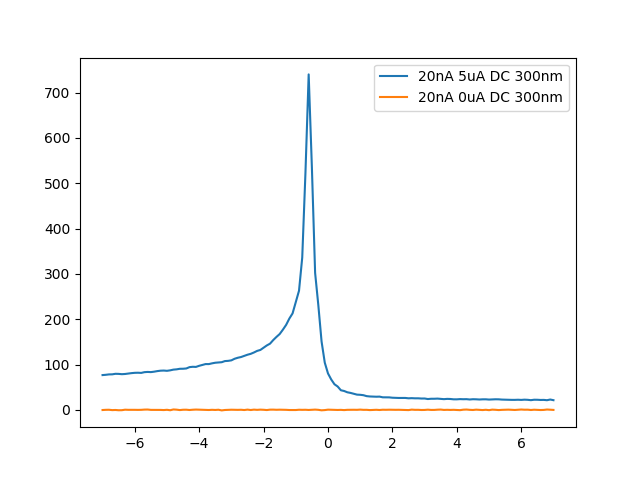

In [34]:
plt.figure()
plt.plot(gvals, data23.lockin865_X[:]/20e-9, label='20nA 5uA DC 300nm')
plt.plot(gvals, data24.lockin865_X[:]/20e-9, label='20nA 0uA DC 300nm')
plt.legend()

In [36]:
srframe.volt_p1(4)

In [37]:
srframe.volt_p1(4)
srframe.volt_p5(-5000e-3)
time.sleep(10)
offvals = np.linspace(-5000e-3, 5000e-3, 201)
data25, plot25 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_20nAexcitation_Vg=4V_dvdi')
srframe.volt_p5(0)

Started at 2020-01-16 13:46:53
DataSet:
   location = 'data/2020-01-16/#009_Nb-Tijunction_42,41-44,45_20nAexcitation_Vg=4V_dvdi_13-46-52'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 13:50:57


In [40]:
srframe.volt_p1(-4)
srframe.volt_p5(-1000e-3)
time.sleep(10)
offvals = np.linspace(-1000e-3, 1000e-3, 201)
data26, plot26 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_20nAexcitation_Vg=-4V_dvdi')
srframe.volt_p5(0)

Started at 2020-01-16 13:54:49
DataSet:
   location = 'data/2020-01-16/#010_Nb-Tijunction_42,41-44,45_20nAexcitation_Vg=-4V_dvdi_13-54-48'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 13:58:53


<IPython.core.display.Javascript object>


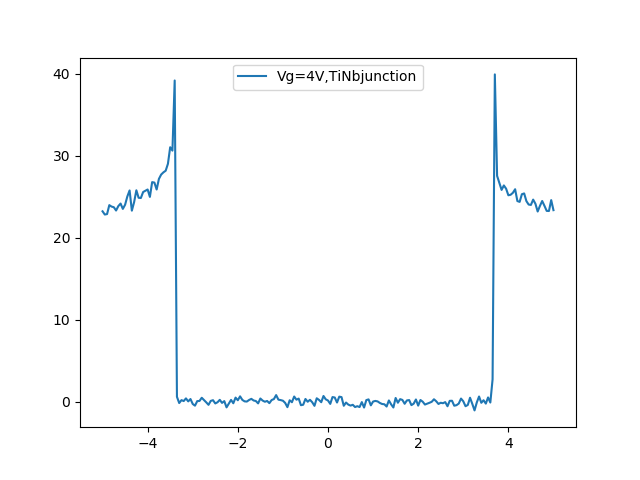

In [42]:
plt.figure()
plt.plot(data25.srframe_volt_p5_set, data25.lockin865_X[:]/20e-9, label='Vg=4V,TiNbjunction')
plt.legend()

<IPython.core.display.Javascript object>


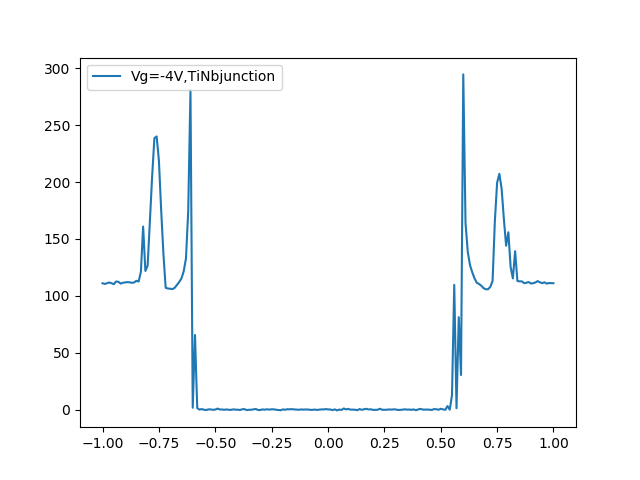

In [43]:
plt.figure()
plt.plot(data26.srframe_volt_p5_set, data26.lockin865_X[:]/20e-9, label='Vg=-4V,TiNbjunction')
plt.legend()

# now go to Ta/Nb DC junction

In [44]:
# 20nA excitation, 5uA DC
srframe.volt_p1(7)
time.sleep(30)
gvals = np.linspace(7, -7, 141)
data27, plot27 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_20nAexcitation_5uADC_gatesweep')
srframe.volt_p1(0)

Started at 2020-01-16 14:10:10
DataSet:
   location = 'data/2020-01-16/#011_Nb-TaDCjunction_31,32-35,34_20nAexcitation_5uADC_gatesweep_14-10-10'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (141,)
   Measured | lockin865_X         | X            | (141,)
   Measured | lockin865_Y         | Y            | (141,)
Finished at 2020-01-16 14:17:51


In [45]:
srframe.volt_p5(0)

In [46]:
# 20nA excitation, 0uA DC
srframe.volt_p1(7)
time.sleep(30)
gvals = np.linspace(7, -7, 141)
data28, plot28 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_20nAexcitation_0uADC_gatesweep')
srframe.volt_p1(0)

Started at 2020-01-16 14:18:49
DataSet:
   location = 'data/2020-01-16/#012_Nb-TaDCjunction_31,32-35,34_20nAexcitation_0uADC_gatesweep_14-18-49'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (141,)
   Measured | lockin865_X         | X            | (141,)
   Measured | lockin865_Y         | Y            | (141,)
Finished at 2020-01-16 14:26:30


<IPython.core.display.Javascript object>


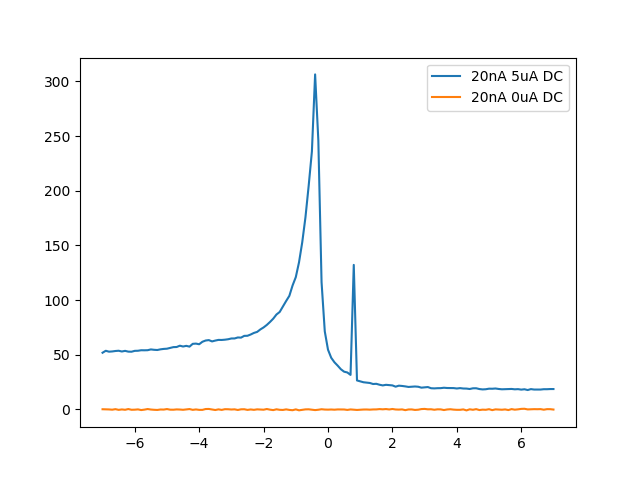

In [47]:
plt.figure()
plt.plot(gvals, data27.lockin865_X[:]/20e-9, label='20nA 5uA DC')
plt.plot(gvals, data28.lockin865_X[:]/20e-9, label='20nA 0uA DC')
plt.legend()

In [48]:
srframe.volt_p1(4)
srframe.volt_p5(-5000e-3)
time.sleep(10)
offvals = np.linspace(-5000e-3, 5000e-3, 201)
data29, plot29 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_20nAexcitation_Vg=4V_dvdi')
srframe.volt_p5(0)

Started at 2020-01-16 14:27:41
DataSet:
   location = 'data/2020-01-16/#013_Nb-TaDCjunction_31,32-35,34_20nAexcitation_Vg=4V_dvdi_14-27-40'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 14:31:45


<IPython.core.display.Javascript object>


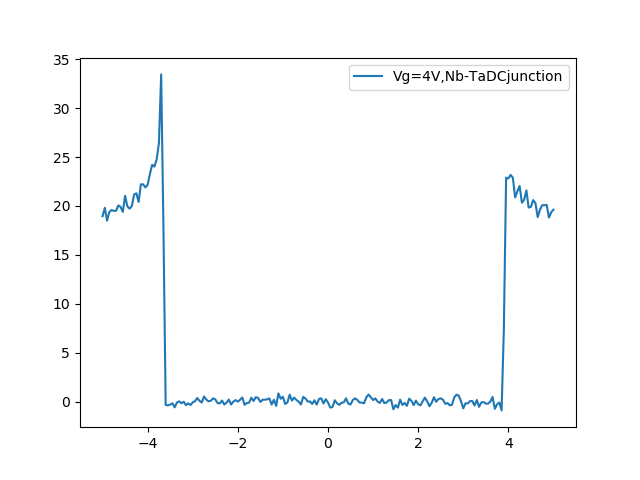

In [52]:
plt.figure()
plt.plot(data29.srframe_volt_p5_set, data29.lockin865_X[:]/20e-9, label='Vg=4V,Nb-TaDCjunction')
plt.legend()

In [53]:
srframe.volt_p1(-4)
srframe.volt_p5(-1500e-3)
time.sleep(10)
offvals = np.linspace(-1500e-3, 1500e-3, 201)
data30, plot30 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_20nAexcitation_Vg=-4V_dvdi')
srframe.volt_p5(0)

Started at 2020-01-16 14:37:24
DataSet:
   location = 'data/2020-01-16/#015_Nb-TaDCjunction_31,32-35,34_20nAexcitation_Vg=-4V_dvdi_14-37-23'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 14:41:27


<IPython.core.display.Javascript object>


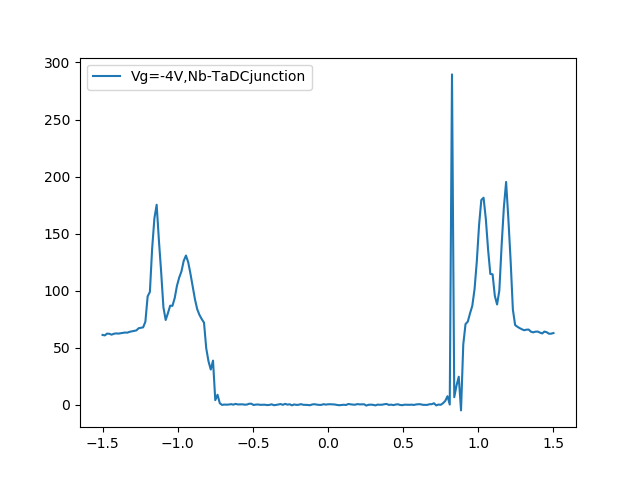

In [54]:
plt.figure()
plt.plot(data30.srframe_volt_p5_set, data30.lockin865_X[:]/20e-9, label='Vg=-4V,Nb-TaDCjunction')
plt.legend()

In [51]:
srframe.volt_p1(0)

# check the temperature dependence

In [55]:
srframe.volt_p1(4)
srframe.volt_p5(-1000e-3)
time.sleep(10)
offvals = np.linspace(-1000e-3, 1000e-3, 201)
data31, plot31 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_dvdi')
srframe.volt_p5(0)
srframe.volt_p1(0)

Started at 2020-01-16 14:51:10
DataSet:
   location = 'data/2020-01-16/#016_RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_dvdi_14-51-09'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 14:55:14


In [57]:
srframe.volt_p1(4)
srframe.volt_p5(-5000e-3)
time.sleep(10)
offvals = np.linspace(-5000e-3, 5000e-3, 201)
data32, plot32 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_baseT')
srframe.volt_p5(0)
lockin865.amplitude(0)

Started at 2020-01-16 15:00:29
DataSet:
   location = 'data/2020-01-16/#017_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_baseT_15-00-28'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 15:04:33


In [68]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-5000e-3)
time.sleep(30)
offvals = np.linspace(-5000e-3, 5000e-3, 201)
data33, plot33 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_baseT')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 15:26:56
DataSet:
   location = 'data/2020-01-16/#024_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_baseT_15-26-55'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 15:32:20


In [70]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-750e-3)
time.sleep(30)
offvals = np.linspace(-750e-3, 750e-3, 201)
data34, plot34 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_200mK')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 15:43:25
DataSet:
   location = 'data/2020-01-16/#025_RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_200mK_15-43-24'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 15:48:52


In [72]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-4000e-3)
time.sleep(30)
offvals = np.linspace(-4000e-3, 4000e-3, 201)
data35, plot35 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_200mK')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 15:52:30
DataSet:
   location = 'data/2020-01-16/#026_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_200mK_15-52-29'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 15:57:54


In [75]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-5000e-3)
time.sleep(30)
offvals = np.linspace(-5000e-3, 5000e-3, 251)
data36, plot36 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_200mK')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 16:04:13
DataSet:
   location = 'data/2020-01-16/#028_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_200mK_16-04-12'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (251,)
   Measured | lockin865_X         | X            | (251,)
   Measured | lockin865_Y         | Y            | (251,)
Finished at 2020-01-16 16:10:58


In [77]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-750e-3)
time.sleep(30)
offvals = np.linspace(-750e-3, 750e-3, 201)
data37, plot37 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_400mK')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 16:15:30
DataSet:
   location = 'data/2020-01-16/#029_RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_400mK_16-15-29'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 16:20:55


In [80]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-4000e-3)
time.sleep(30)
offvals = np.linspace(-4000e-3, 4000e-3, 201)
data38, plot38 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_400mK')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 16:26:32
DataSet:
   location = 'data/2020-01-16/#031_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_400mK_16-26-31'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 16:31:56


In [83]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-5000e-3)
time.sleep(30)
offvals = np.linspace(-5000e-3, 5000e-3, 251)
data39, plot39 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_400mK')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 16:38:32
DataSet:
   location = 'data/2020-01-16/#033_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_400mK_16-38-31'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (251,)
   Measured | lockin865_X         | X            | (251,)
   Measured | lockin865_Y         | Y            | (251,)
Finished at 2020-01-16 16:45:17


In [85]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-750e-3)
time.sleep(30)
offvals = np.linspace(-750e-3, 750e-3, 201)
data40, plot40 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_700mK')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 16:50:47
DataSet:
   location = 'data/2020-01-16/#034_RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_700mK_16-50-46'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 16:56:11


In [87]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-4000e-3)
time.sleep(30)
offvals = np.linspace(-4000e-3, 4000e-3, 201)
data41, plot41 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_700mK')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 16:59:43
DataSet:
   location = 'data/2020-01-16/#035_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_700mK_16-59-42'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 17:05:07


In [89]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-600e-3)
time.sleep(30)
offvals = np.linspace(-600e-3, 600e-3, 201)
data42, plot42 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_1K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 17:10:40
DataSet:
   location = 'data/2020-01-16/#036_RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_1K_17-10-39'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 17:16:04


In [91]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-4000e-3)
time.sleep(30)
offvals = np.linspace(-4000e-3, 4000e-3, 201)
data43, plot43 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_1K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 17:19:27
DataSet:
   location = 'data/2020-01-16/#037_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_1K_17-19-26'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 17:24:51


In [93]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-600e-3)
time.sleep(30)
offvals = np.linspace(-600e-3, 600e-3, 201)
data44, plot44 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_1.2K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 17:31:27
DataSet:
   location = 'data/2020-01-16/#038_RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_1.2K_17-31-26'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 17:36:51


In [99]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-4000e-3)
time.sleep(30)
offvals = np.linspace(-4000e-3, 4000e-3, 201)
data45, plot45 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_1.5K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 17:51:06
DataSet:
   location = 'data/2020-01-16/#040_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_1.5K_17-51-05'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 17:56:30


In [101]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-600e-3)
time.sleep(30)
offvals = np.linspace(-600e-3, 600e-3, 201)
data46, plot46 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_1.5K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 17:59:46
DataSet:
   location = 'data/2020-01-16/#041_RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_1.5K_17-59-45'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 18:05:10


In [113]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-4000e-3)
time.sleep(30)
offvals = np.linspace(-4000e-3, 4000e-3, 201)
data55, plot55 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_1.7K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 19:07:14
DataSet:
   location = 'data/2020-01-16/#047_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_1.7K_19-07-13'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 19:12:38


In [117]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-600e-3)
time.sleep(30)
offvals = np.linspace(-600e-3, 600e-3, 201)
data56, plot56 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_1.7K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 19:57:10
DataSet:
   location = 'data/2020-01-16/#049_RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_1.7K_19-57-09'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 20:02:34


In [121]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-4000e-3)
time.sleep(30)
offvals = np.linspace(-4000e-3, 4000e-3, 201)
data58, plot58 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_2K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 20:16:59
DataSet:
   location = 'data/2020-01-16/#051_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_2K_20-16-58'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 20:22:24


In [125]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-600e-3)
time.sleep(30)
offvals = np.linspace(-600e-3, 600e-3, 201)
data60, plot60 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_2K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 20:33:08
DataSet:
   location = 'data/2020-01-16/#053_RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_2K_20-33-07'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 20:38:32


In [161]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(5000e-3)
time.sleep(30)
offvals = np.linspace(5000e-3, -5000e-3, 201)
data71, plot71 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_2K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 11:33:48
DataSet:
   location = 'data/2020-01-17/#004_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_2K_11-33-47'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 11:39:12


In [163]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(5000e-3)
time.sleep(30)
offvals = np.linspace(5000e-3, -5000e-3, 201)
data72, plot72 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_2.2K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 11:50:13
DataSet:
   location = 'data/2020-01-17/#005_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_2.2K_11-50-12'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 11:55:37


In [165]:
srframe.volt_p1(-4)
lockin865.amplitude(0.01)

In [166]:
srframe.volt_p1(-4)
lockin865.amplitude(0.01)
srframe.volt_p5(1000e-3)
time.sleep(30)
offvals = np.linspace(1000e-3, -5000e-3, 201)
data73, plot73 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=-4V_dvdi_2.2K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 11:57:46
DataSet:
   location = 'data/2020-01-17/#006_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=-4V_dvdi_2.2K_11-57-45'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 11:59:26
Keyboard Interrupt


In [168]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-4000e-3)
time.sleep(30)
offvals = np.linspace(-4000e-3, 4000e-3, 201)
data74, plot74 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_2.2K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 12:03:25
DataSet:
   location = 'data/2020-01-17/#007_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_2.2K_12-03-24'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 12:07:29


In [169]:
srframe.volt_p1(-4)
lockin865.amplitude(0.01)
srframe.volt_p5(-1000e-3)
time.sleep(30)
offvals = np.linspace(-1000e-3, 1000e-3, 201)
data75, plot75 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_2.2K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 12:08:25
DataSet:
   location = 'data/2020-01-17/#008_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_2.2K_12-08-24'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 12:12:29


In [173]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-600e-3)
time.sleep(30)
offvals = np.linspace(-600e-3, 600e-3, 201)
data76, plot76 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_2.2K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)


Started at 2020-01-17 12:34:13
DataSet:
   location = 'data/2020-01-17/#009_RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_2.2K_12-34-12'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 12:39:38


In [175]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-600e-3)
time.sleep(30)
offvals = np.linspace(-600e-3, 600e-3, 201)
data77, plot77 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_2.5K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 12:42:09
DataSet:
   location = 'data/2020-01-17/#010_RFNbTajunction_28,27-6,7_300nm_10nAexcitation_Vg=4V_2.5K_12-42-08'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 12:47:45


In [179]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-4000e-3)
time.sleep(30)
offvals = np.linspace(-4000e-3, 4000e-3, 201)
data78, plot78 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_2.5K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 12:51:09
DataSet:
   location = 'data/2020-01-17/#011_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_2.5K_12-51-09'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 12:55:13


In [180]:
srframe.volt_p1(-4)
lockin865.amplitude(0.01)
srframe.volt_p5(-750e-3)
time.sleep(30)
offvals = np.linspace(-750e-3, 750e-3, 201)
data79, plot79 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_2.5K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 12:56:09
DataSet:
   location = 'data/2020-01-17/#012_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_2.5K_12-56-08'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 13:00:13


In [183]:
srframe.volt_p1(-4)
lockin865.amplitude(0.01)
srframe.volt_p5(1000e-3)
time.sleep(30)
offvals = np.linspace(1000e-3, -1000e-3, 201)
data80, plot80 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=-4V_dvdi_2.5K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 13:05:24
DataSet:
   location = 'data/2020-01-17/#013_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=-4V_dvdi_2.5K_13-05-23'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 13:09:27


In [184]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(4000e-3)
time.sleep(30)
offvals = np.linspace(4000e-3, -4000e-3, 201)
data81, plot81 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_2.5K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 13:10:23
DataSet:
   location = 'data/2020-01-17/#014_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_2.5K_13-10-23'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 13:14:27


In [187]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(4000e-3)
time.sleep(30)
offvals = np.linspace(4000e-3, -4000e-3, 201)
data82, plot82 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_3K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 13:17:41
DataSet:
   location = 'data/2020-01-17/#015_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_3K_13-17-41'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 13:21:45


In [188]:
srframe.volt_p1(-4)
lockin865.amplitude(0.01)
srframe.volt_p5(1000e-3)
time.sleep(30)
offvals = np.linspace(1000e-3, -1000e-3, 201)
data83, plot83 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=-4V_dvdi_3K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 13:22:41
DataSet:
   location = 'data/2020-01-17/#016_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=-4V_dvdi_3K_13-22-40'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 13:26:45


In [191]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-3000e-3)
time.sleep(30)
offvals = np.linspace(-3000e-3, 3000e-3, 201)
data84, plot84 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_3K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 13:31:40
DataSet:
   location = 'data/2020-01-17/#017_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_3K_13-31-40'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 13:35:44


In [192]:
srframe.volt_p1(-4)
lockin865.amplitude(0.01)
srframe.volt_p5(-750e-3)
time.sleep(30)
offvals = np.linspace(-750e-3, 750e-3, 201)
data85, plot85 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_3K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 13:36:38
DataSet:
   location = 'data/2020-01-17/#018_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_3K_13-36-37'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 13:40:42


In [195]:
srframe.volt_p1(-4)
lockin865.amplitude(0.01)
srframe.volt_p5(-500e-3)
time.sleep(30)
offvals = np.linspace(-500e-3, 500e-3, 201)
data86, plot86 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_3.5K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 13:44:06
DataSet:
   location = 'data/2020-01-17/#019_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_3.5K_13-44-05'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 13:48:10


In [196]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-3000e-3)
time.sleep(30)
offvals = np.linspace(-3000e-3, 3000e-3, 201)
data87, plot87 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_3.5K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)


Started at 2020-01-17 13:49:03
DataSet:
   location = 'data/2020-01-17/#020_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_3.5K_13-49-02'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 13:53:07


In [199]:
srframe.volt_p1(-4)
lockin865.amplitude(0.01)
srframe.volt_p5(500e-3)
time.sleep(30)
offvals = np.linspace(500e-3, -500e-3, 201)
data88, plot88 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=-4V_dvdi_3.5K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 13:57:54
DataSet:
   location = 'data/2020-01-17/#021_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=-4V_dvdi_3.5K_13-57-53'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 14:01:57


In [200]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(3000e-3)
time.sleep(30)
offvals = np.linspace(3000e-3, -3000e-3, 201)
data89, plot89 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_3.5K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 14:02:51
DataSet:
   location = 'data/2020-01-17/#022_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_3.5K_14-02-50'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 14:06:55


In [203]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(3000e-3)
time.sleep(30)
offvals = np.linspace(3000e-3, -3000e-3, 201)
data90, plot90 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_4K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 14:09:20
DataSet:
   location = 'data/2020-01-17/#023_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_4K_14-09-19'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 14:13:24


In [204]:
srframe.volt_p1(-4)
lockin865.amplitude(0.01)
srframe.volt_p5(500e-3)
time.sleep(30)
offvals = np.linspace(500e-3, -500e-3, 201)
data91, plot91 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=-4V_dvdi_4K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 14:14:17
DataSet:
   location = 'data/2020-01-17/#024_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=-4V_dvdi_4K_14-14-16'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 14:18:21


In [207]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-3000e-3)
time.sleep(30)
offvals = np.linspace(-3000e-3, 3000e-3, 201)
data92, plot92 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_4K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 14:22:18
DataSet:
   location = 'data/2020-01-17/#025_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_4K_14-22-17'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 14:26:22


In [208]:
srframe.volt_p1(-4)
lockin865.amplitude(0.01)
srframe.volt_p5(-500e-3)
time.sleep(30)
offvals = np.linspace(-500e-3, 500e-3, 201)
data93, plot93 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_4K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 14:27:15
DataSet:
   location = 'data/2020-01-17/#026_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_4K_14-27-14'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 14:31:19


In [211]:
srframe.volt_p1(-4)
lockin865.amplitude(0.01)
srframe.volt_p5(500e-3)
time.sleep(30)
offvals = np.linspace(500e-3, -500e-3, 201)
data94, plot94 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=-4V_dvdi_4.5K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 14:37:20
DataSet:
   location = 'data/2020-01-17/#027_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=-4V_dvdi_4.5K_14-37-19'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 14:41:35


In [212]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(3000e-3)
time.sleep(30)
offvals = np.linspace(3000e-3, -3000e-3, 201)
data95, plot95 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_4.5K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 14:42:28
DataSet:
   location = 'data/2020-01-17/#028_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_4.5K_14-42-27'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-17 14:46:32


<IPython.core.display.Javascript object>


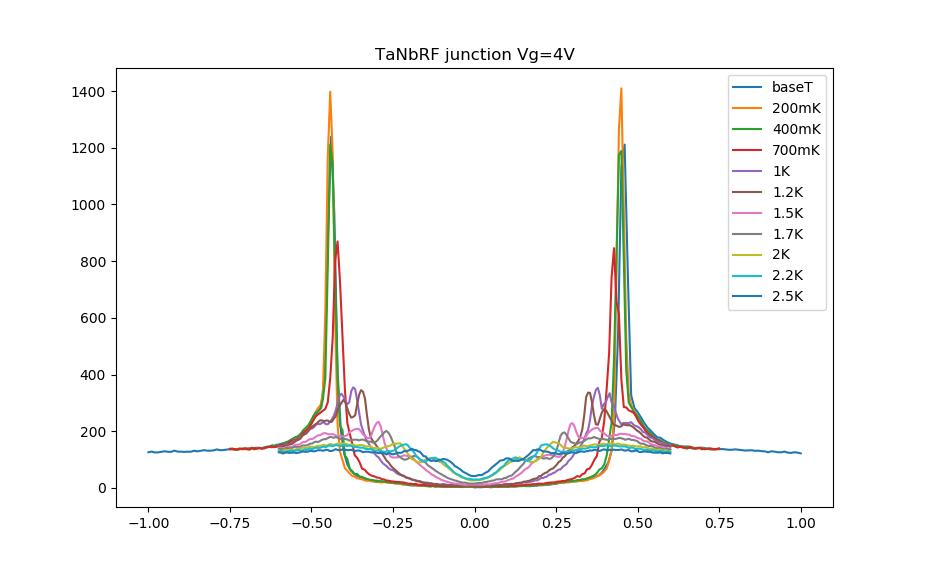

In [220]:
plt.figure()
plt.plot(data31.srframe_volt_p5_set, data31.lockin865_X[:]/10e-9, label='baseT')
plt.plot(data34.srframe_volt_p5_set, data34.lockin865_X[:]/10e-9, label='200mK')
plt.plot(data37.srframe_volt_p5_set, data37.lockin865_X[:]/10e-9, label='400mK')
plt.plot(data40.srframe_volt_p5_set, data40.lockin865_X[:]/10e-9, label='700mK')
plt.plot(data42.srframe_volt_p5_set, data42.lockin865_X[:]/10e-9, label='1K')
plt.plot(data44.srframe_volt_p5_set, data44.lockin865_X[:]/10e-9, label='1.2K')
plt.plot(data46.srframe_volt_p5_set, data46.lockin865_X[:]/10e-9, label='1.5K')
plt.plot(data56.srframe_volt_p5_set, data56.lockin865_X[:]/10e-9, label='1.7K')
plt.plot(data60.srframe_volt_p5_set, data60.lockin865_X[:]/10e-9, label='2K')
plt.plot(data76.srframe_volt_p5_set, data76.lockin865_X[:]/10e-9, label='2.2K')
plt.plot(data77.srframe_volt_p5_set, data77.lockin865_X[:]/10e-9, label='2.5K')
plt.title('TaNbRF junction Vg=4V')
plt.legend()


In [103]:
lockin865.amplitude(0.01)

In [104]:
# 10nA excitation, 0uA DC
srframe.volt_p1(-7)
time.sleep(30)
gvals = np.linspace(-7, 7, 141)
data47, plot47 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, DataName='NbJJ1_28,27-6,7_300nm_10nAexcitation_0uADC_gatesweep_1.5K')
srframe.volt_p1(0)

Started at 2020-01-16 18:08:03
DataSet:
   location = 'data/2020-01-16/#042_NbJJ1_28,27-6,7_300nm_10nAexcitation_0uADC_gatesweep_1.5K_18-08-02'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (141,)
   Measured | lockin865_X         | X            | (141,)
   Measured | lockin865_Y         | Y            | (141,)
Finished at 2020-01-16 18:15:43


In [105]:
# 10nA excitation, 1uA DC
srframe.volt_p1(-7)
srframe.volt_p5(1)
time.sleep(30)
gvals = np.linspace(-7, 7, 141)
data48, plot48 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, DataName='NbJJ1_28,27-6,7_300nm_10nAexcitation_1uADC_gatesweep_1.5K')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-16 18:16:44
DataSet:
   location = 'data/2020-01-16/#043_NbJJ1_28,27-6,7_300nm_10nAexcitation_1uADC_gatesweep_1.5K_18-16-43'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (141,)
   Measured | lockin865_X         | X            | (141,)
   Measured | lockin865_Y         | Y            | (141,)
Finished at 2020-01-16 18:24:24


<IPython.core.display.Javascript object>


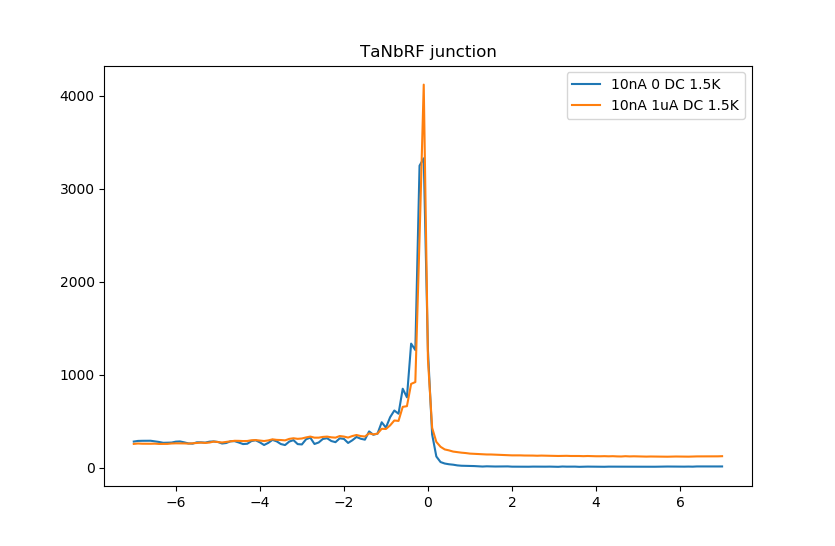

In [106]:
plt.figure()
plt.plot(gvals, data47.lockin865_X[:]/10e-9, label='10nA 0 DC 1.5K')
plt.plot(gvals, data48.lockin865_X[:]/10e-9, label='10nA 1uA DC 1.5K')
plt.title('TaNbRF junction')
plt.legend()

In [108]:
# 10nA excitation, 0uA DC
srframe.volt_p1(7)
lockin865.amplitude(0.01)
time.sleep(30)
gvals = np.linspace(7, -7, 141)
data49, plot49 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_0uADC_gatesweep_1.5K')
srframe.volt_p1(0)

Started at 2020-01-16 18:30:52
DataSet:
   location = 'data/2020-01-16/#044_Nb-TaDCjunction_31,32-35,34_10nAexcitation_0uADC_gatesweep_1.5K_18-30-51'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (141,)
   Measured | lockin865_X         | X            | (141,)
   Measured | lockin865_Y         | Y            | (141,)
Finished at 2020-01-16 18:38:32


In [109]:
# 10nA excitation, 0uA DC
srframe.volt_p1(7)
srframe.volt_p5(1)
lockin865.amplitude(0.01)
time.sleep(30)
gvals = np.linspace(7, -7, 141)
data50, plot50 = npd.single_param_sweep(srframe.volt_p1, gvals, 3, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_1uADC_gatesweep_1.5K')
srframe.volt_p1(0)
srframe.volt_p5(0)

Started at 2020-01-16 18:39:33
DataSet:
   location = 'data/2020-01-16/#045_Nb-TaDCjunction_31,32-35,34_10nAexcitation_1uADC_gatesweep_1.5K_18-39-32'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (141,)
   Measured | lockin865_X         | X            | (141,)
   Measured | lockin865_Y         | Y            | (141,)
Finished at 2020-01-16 18:47:22


In [225]:
plt.figure()
plt.plot(gvals, data49.lockin865_X[:]/10e-9, label='10nA 0 DC 1.5K')
plt.plot(gvals, data50.lockin865_X[:]/10e-9, label='10nA 1uA DC 1.5K')
plt.title('TaNbDC junction')
plt.legend()

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension, but have shapes (61,) and (141,)

In [111]:
srframe.volt_p1(-4)
lockin865.amplitude(0.01)
srframe.volt_p5(-1000e-3)
time.sleep(30)
offvals = np.linspace(-1000e-3, 1000e-3, 201)
data51, plot51 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_1.5K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 18:50:09
DataSet:
   location = 'data/2020-01-16/#046_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_1.5K_18-50-08'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 18:55:33


In [119]:
srframe.volt_p1(-4)
lockin865.amplitude(0.01)
srframe.volt_p5(-1000e-3)
time.sleep(30)
offvals = np.linspace(-1000e-3, 1000e-3, 201)
data57, plot57 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_1.7K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 20:07:48
DataSet:
   location = 'data/2020-01-16/#050_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_1.7K_20-07-47'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 20:13:12


In [122]:
srframe.volt_p1(-4)
lockin865.amplitude(0.01)
srframe.volt_p5(-1000e-3)
time.sleep(30)
offvals = np.linspace(-1000e-3, 1000e-3, 201)
data59, plot59 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_1.7K')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-16 20:23:20
DataSet:
   location = 'data/2020-01-16/#052_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_1.7K_20-23-19'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 20:28:44


<IPython.core.display.Javascript object>


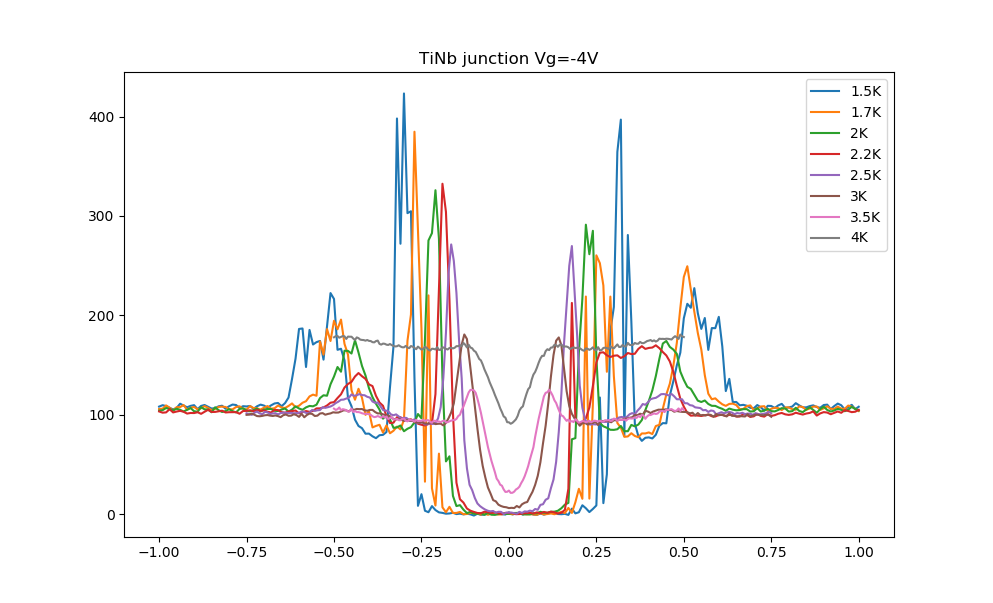

In [219]:
plt.figure()
plt.plot(data51.srframe_volt_p5_set, data51.lockin865_X[:]/10e-9, label='1.5K')
plt.plot(data57.srframe_volt_p5_set, data57.lockin865_X[:]/10e-9, label='1.7K')
plt.plot(data59.srframe_volt_p5_set, data59.lockin865_X[:]/10e-9, label='2K')
plt.plot(data75.srframe_volt_p5_set, data75.lockin865_X[:]/10e-9, label='2.2K')
plt.plot(data79.srframe_volt_p5_set, data79.lockin865_X[:]/10e-9, label='2.5K')
plt.plot(data85.srframe_volt_p5_set, data85.lockin865_X[:]/10e-9, label='3K')
plt.plot(data86.srframe_volt_p5_set, data86.lockin865_X[:]/10e-9, label='3.5K')
plt.plot(data93.srframe_volt_p5_set, data93.lockin865_X[:]/10e-9, label='4K')
plt.title('TiNb junction Vg=-4V')
plt.legend()

<IPython.core.display.Javascript object>


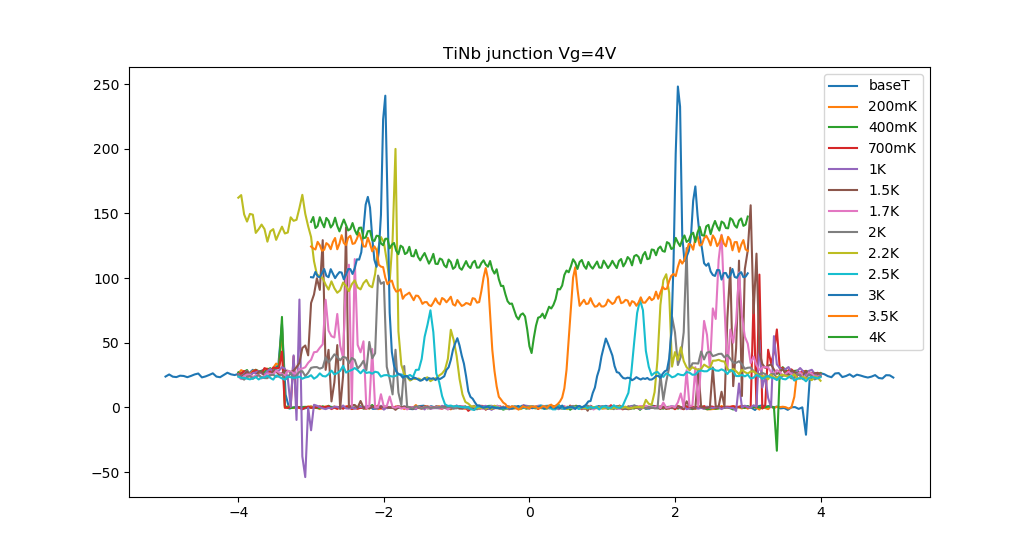

In [218]:
plt.figure()
plt.plot(data32.srframe_volt_p5_set, data32.lockin865_X[:]/10e-9, label='baseT')
plt.plot(data35.srframe_volt_p5_set, data35.lockin865_X[:]/10e-9, label='200mK')
plt.plot(data38.srframe_volt_p5_set, data38.lockin865_X[:]/10e-9, label='400mK')
plt.plot(data41.srframe_volt_p5_set, data41.lockin865_X[:]/10e-9, label='700mK')
plt.plot(data43.srframe_volt_p5_set, data43.lockin865_X[:]/10e-9, label='1K')
plt.plot(data45.srframe_volt_p5_set, data45.lockin865_X[:]/10e-9, label='1.5K')
plt.plot(data55.srframe_volt_p5_set, data55.lockin865_X[:]/10e-9, label='1.7K')
plt.plot(data58.srframe_volt_p5_set, data58.lockin865_X[:]/10e-9, label='2K')
plt.plot(data74.srframe_volt_p5_set, data74.lockin865_X[:]/10e-9, label='2.2K')
plt.plot(data78.srframe_volt_p5_set, data78.lockin865_X[:]/10e-9, label='2.5K')
plt.plot(data84.srframe_volt_p5_set, data84.lockin865_X[:]/10e-9, label='3K')
plt.plot(data87.srframe_volt_p5_set, data87.lockin865_X[:]/10e-9, label='3.5K')
plt.plot(data92.srframe_volt_p5_set, data92.lockin865_X[:]/10e-9, label='4K')
plt.title('TiNb junction Vg=4V')
plt.legend()

<IPython.core.display.Javascript object>


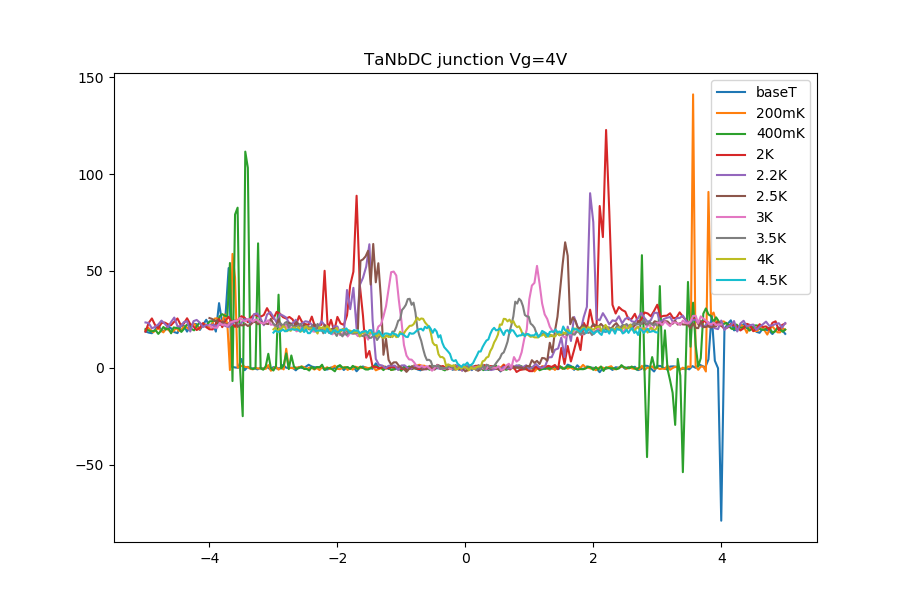

In [217]:
plt.figure()
plt.plot(data33.srframe_volt_p5_set, data33.lockin865_X[:]/10e-9, label='baseT')
plt.plot(data36.srframe_volt_p5_set, data36.lockin865_X[:]/10e-9, label='200mK')
plt.plot(data39.srframe_volt_p5_set, data39.lockin865_X[:]/10e-9, label='400mK')
plt.plot(data71.srframe_volt_p5_set, data71.lockin865_X[:]/10e-9, label='2K')
plt.plot(data72.srframe_volt_p5_set, data72.lockin865_X[:]/10e-9, label='2.2K')
plt.plot(data81.srframe_volt_p5_set, data81.lockin865_X[:]/10e-9, label='2.5K')
plt.plot(data82.srframe_volt_p5_set, data82.lockin865_X[:]/10e-9, label='3K')
plt.plot(data89.srframe_volt_p5_set, data89.lockin865_X[:]/10e-9, label='3.5K')
plt.plot(data90.srframe_volt_p5_set, data90.lockin865_X[:]/10e-9, label='4K')
plt.plot(data95.srframe_volt_p5_set, data95.lockin865_X[:]/10e-9, label='4.5K')
plt.title('TaNbDC junction Vg=4V')
plt.legend()

<IPython.core.display.Javascript object>


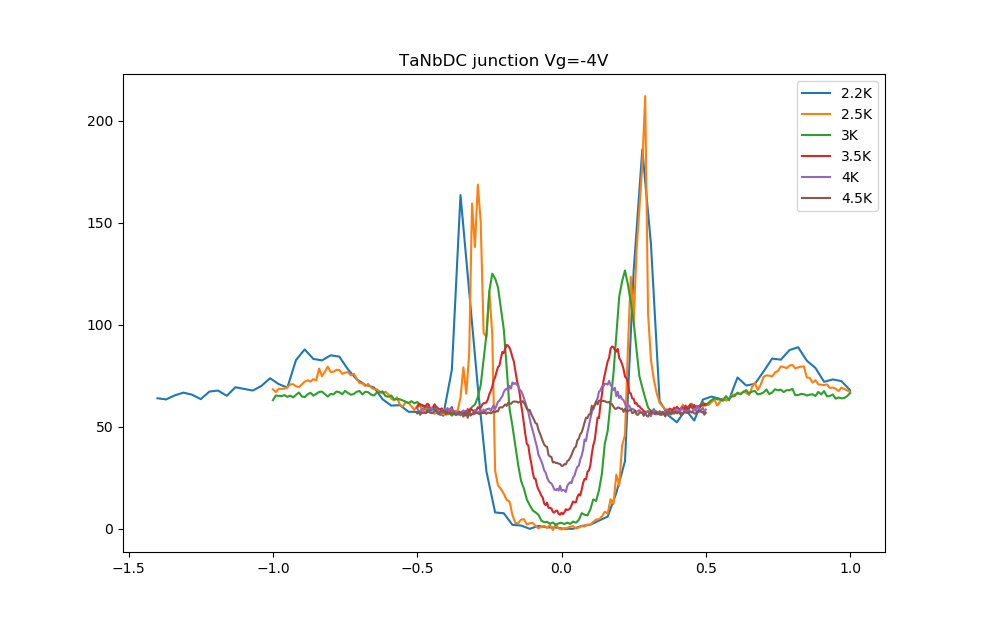

In [214]:
plt.figure()
plt.plot(data73.srframe_volt_p5_set, data73.lockin865_X[:]/10e-9, label='2.2K')
plt.plot(data80.srframe_volt_p5_set, data80.lockin865_X[:]/10e-9, label='2.5K')
plt.plot(data83.srframe_volt_p5_set, data83.lockin865_X[:]/10e-9, label='3K')
plt.plot(data88.srframe_volt_p5_set, data88.lockin865_X[:]/10e-9, label='3.5K')
plt.plot(data91.srframe_volt_p5_set, data91.lockin865_X[:]/10e-9, label='4K')
plt.plot(data94.srframe_volt_p5_set, data94.lockin865_X[:]/10e-9, label='4.5K')
plt.title('TaNbDC junction Vg=-4V')
plt.legend()

In [141]:
triton.MC_temp()

0.116838

In [142]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-5000e-3)
time.sleep(10)
offvals = np.linspace(-5000e-3, 5000e-3, 201)
data61, plot61 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi')
srframe.volt_p5(0)

Started at 2020-01-16 21:24:51
DataSet:
   location = 'data/2020-01-16/#054_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_21-24-51'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 21:28:55


In [143]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(5000e-3)
time.sleep(10)
offvals = np.linspace(5000e-3, -5000e-3, 201)
data62, plot62 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi')
srframe.volt_p5(0)

Started at 2020-01-16 21:29:26
DataSet:
   location = 'data/2020-01-16/#055_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=4V_dvdi_21-29-25'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 21:33:30


<IPython.core.display.Javascript object>


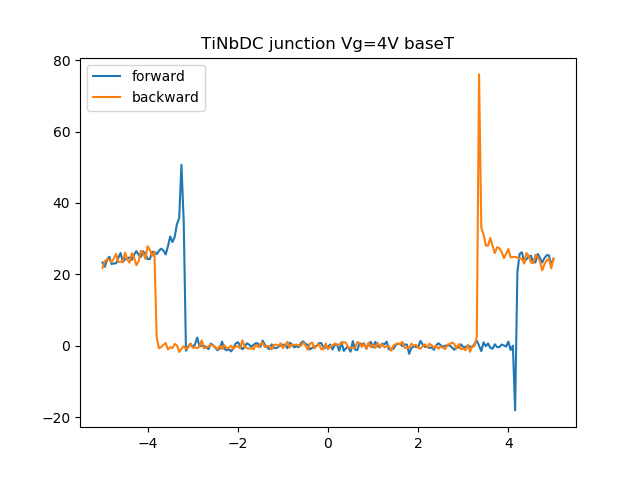

In [224]:
plt.figure()
plt.plot(data61.srframe_volt_p5_set, data61.lockin865_X[:]/10e-9, label='forward')
plt.plot(data62.srframe_volt_p5_set, data62.lockin865_X[:]/10e-9, label='backward')
plt.title('TiNbDC junction Vg=4V baseT')
plt.legend()

In [145]:
srframe.volt_p1(-4)
srframe.volt_p5(-1000e-3)
time.sleep(10)
offvals = np.linspace(-1000e-3, 1000e-3, 201)
data63, plot63 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi')
srframe.volt_p5(0)  

Started at 2020-01-16 21:35:50
DataSet:
   location = 'data/2020-01-16/#056_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_21-35-49'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 21:39:54


In [147]:
srframe.volt_p1(-4)
srframe.volt_p5(1000e-3)
time.sleep(10)
offvals = np.linspace(1000e-3, -1000e-3, 201)
data64, plot64 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi')
srframe.volt_p5(0)  

Started at 2020-01-16 21:44:31
DataSet:
   location = 'data/2020-01-16/#058_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-4V_dvdi_21-44-27'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 21:48:40


<IPython.core.display.Javascript object>


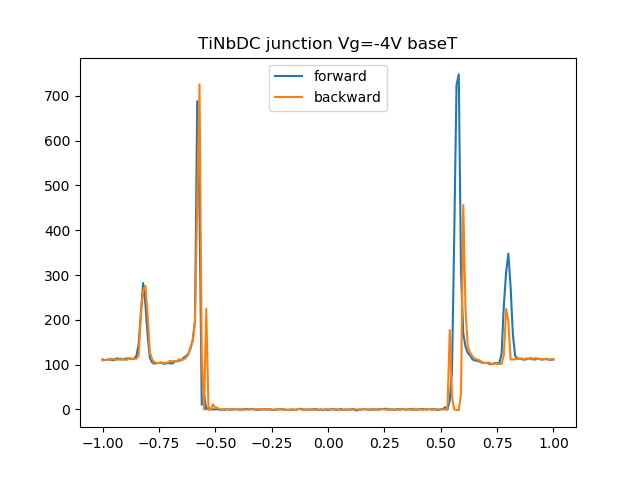

In [223]:
plt.figure()
plt.plot(data63.srframe_volt_p5_set, data63.lockin865_X[:]/10e-9, label='forward')
plt.plot(data64.srframe_volt_p5_set, data64.lockin865_X[:]/10e-9, label='backward')
plt.title('TiNbDC junction Vg=-4V baseT')
plt.legend()

In [158]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(-5000e-3)
time.sleep(30)
offvals = np.linspace(-5000e-3, 5000e-3, 251)
data69, plot69 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_baseT')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 10:07:48
DataSet:
   location = 'data/2020-01-17/#002_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_baseT_10-07-47'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (251,)
   Measured | lockin865_X         | X            | (251,)
   Measured | lockin865_Y         | Y            | (251,)
Finished at 2020-01-17 10:14:33


In [159]:
srframe.volt_p1(4)
lockin865.amplitude(0.01)
srframe.volt_p5(5000e-3)
time.sleep(30)
offvals = np.linspace(5000e-3, -5000e-3, 251)
data70, plot70 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.5, lockin865.X, lockin865.Y, DataName='Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_baseT')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 10:19:22
DataSet:
   location = 'data/2020-01-17/#003_Nb-TaDCjunction_31,32-35,34_10nAexcitation_Vg=4V_dvdi_baseT_10-19-21'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (251,)
   Measured | lockin865_X         | X            | (251,)
   Measured | lockin865_Y         | Y            | (251,)
Finished at 2020-01-17 10:26:07


<IPython.core.display.Javascript object>


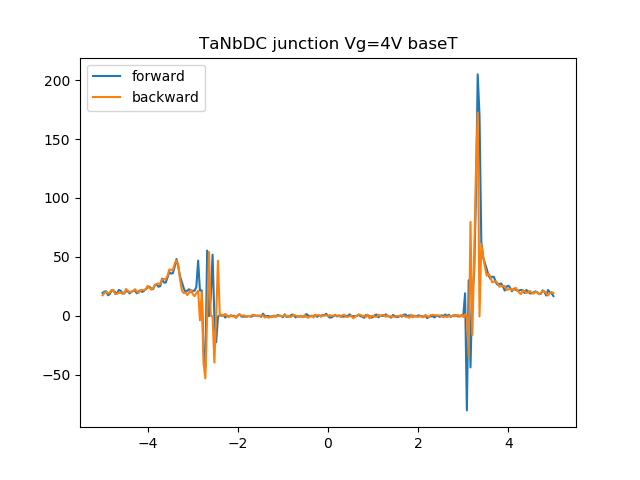

In [222]:
plt.figure()
plt.plot(data69.srframe_volt_p5_set, data69.lockin865_X[:]/10e-9, label='forward')
plt.plot(data70.srframe_volt_p5_set, data70.lockin865_X[:]/10e-9, label='backward')
plt.title('TaNbDC junction Vg=4V baseT')
plt.legend()

In [149]:
srframe.volt_p1(7)
lockin865.amplitude(0.01)
srframe.volt_p5(7000e-3)
time.sleep(10)
offvals = np.linspace(7000e-3, -7000e-3, 201)
data65, plot65 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=7V_dvdi')
srframe.volt_p5(0)

Started at 2020-01-16 21:53:05
DataSet:
   location = 'data/2020-01-16/#059_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=7V_dvdi_21-53-04'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 21:57:09


In [150]:
srframe.volt_p1(-7)
srframe.volt_p5(2000e-3)
time.sleep(10)
offvals = np.linspace(2000e-3, -2000e-3, 201)
data66, plot66 = npd.single_param_sweep(srframe.volt_p5, offvals, 1.1, lockin865.X, lockin865.Y, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-7V_dvdi')
srframe.volt_p5(0)  

Started at 2020-01-16 21:58:37
DataSet:
   location = 'data/2020-01-16/#060_Nb-Tijunction_42,41-44,45_10nAexcitation_Vg=-7V_dvdi_21-58-36'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p5_set | volt_p5      | (201,)
   Measured | lockin865_X         | X            | (201,)
   Measured | lockin865_Y         | Y            | (201,)
Finished at 2020-01-16 22:02:41


In [151]:
offvals = np.linspace(-6000e-3, 6000e-3, 201)
gvals = np.linspace(7, -1, 81)
data67, plot67 = npd.twod_param_sweep(srframe.volt_p1, gvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=20, SetDelay2=1.1, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_dvdi-Vgsweep')
srframe.volt_p5(0)

Started at 2020-01-16 22:08:24
DataSet:
   location = 'data/2020-01-16/#061_Nb-Tijunction_42,41-44,45_10nAexcitation_dvdi-Vgsweep_22-08-22'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (81,)
   Setpoint | srframe_volt_p5_set | volt_p5      | (81, 201)
   Measured | lockin865_X         | X            | (81, 201)
   Measured | lockin865_Y         | Y            | (81, 201)
Finished at 2020-01-17 04:24:35


In [152]:
offvals = np.linspace(-1200e-3, 1200e-3, 201)
gvals = np.linspace(-1, -7, 61)
data68, plot68 = npd.twod_param_sweep(srframe.volt_p1, gvals, srframe.volt_p5, offvals, lockin865.X, lockin865.Y, SetDelay1=20, SetDelay2=1.1, DataName='Nb-Tijunction_42,41-44,45_10nAexcitation_dvdi-Vgsweep')
srframe.volt_p5(0)
srframe.volt_p1(0)
lockin865.amplitude(0)

Started at 2020-01-17 04:24:48
DataSet:
   location = 'data/2020-01-17/#001_Nb-Tijunction_42,41-44,45_10nAexcitation_dvdi-Vgsweep_04-24-47'
   <Type>   | <array_id>          | <array.name> | <array.shape>
   Setpoint | srframe_volt_p1_set | volt_p1      | (61,)
   Setpoint | srframe_volt_p5_set | volt_p5      | (61, 201)
   Measured | lockin865_X         | X            | (61, 201)
   Measured | lockin865_Y         | Y            | (61, 201)
Finished at 2020-01-17 08:49:32


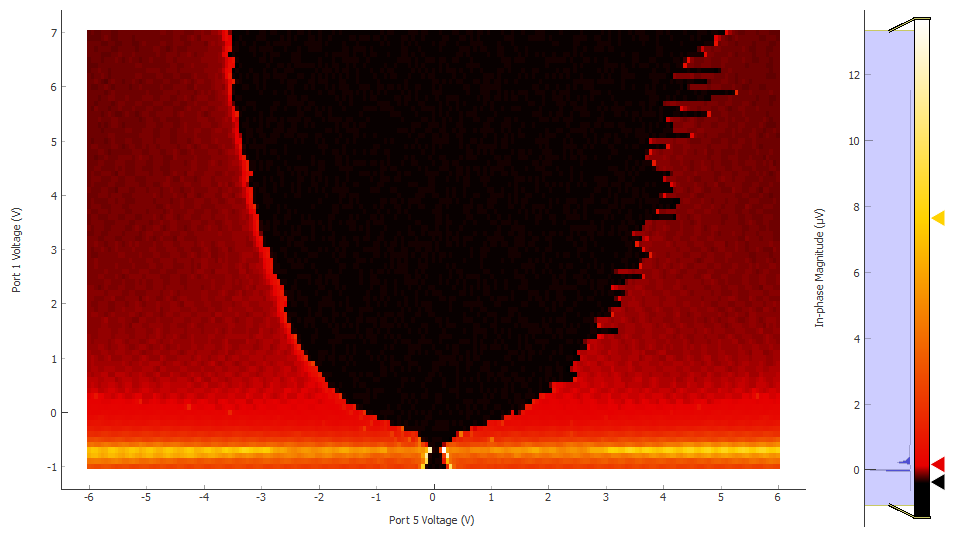

In [153]:
plot67[0]#Ti_Nb junction base temperature gate sweep

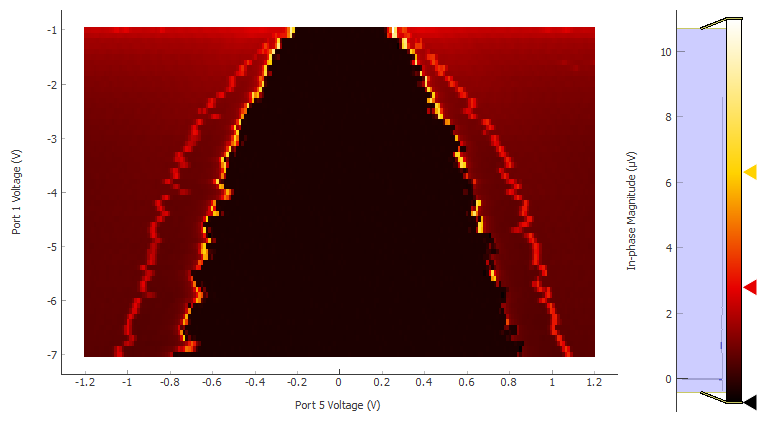

In [155]:
plot68[0]